Name - Shiv Pratap Singh,
Reg No -  200968038,
Week - 2, DataSet - Bollywood.csv

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('bollywood.csv')

In [3]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


Q1 - How many records are present in the dataset?


In [4]:
df.shape[0]

149

149 records present in the dataset

In [5]:
df.Genre = df.Genre.str.strip()

Q2 - How many movies were released in each Release Time?Sort number of releases in Release Time  in descending order.

In [94]:
df.ReleaseTime.value_counts()

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

Q3 -Which genre had highest number of releases during the Festive Season?

In [8]:
GenreBest = Release.get_group('FS')
GenreBest

,SlNo,Release Date,MovieName,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
23,24,2-Oct-14,Haider,Drama,24,69.0,7048104,23590,2443
31,32,15-Feb-13,Murder 3,Thriller,12,25.0,2249055,1879,747
40,41,8-Mar-13,"Saheb, Biwi Aur Gangster Returns",Drama,15,22.0,1176596,1037,189
62,63,19-Apr-13,Ek Thi Daayan,Thriller,24,45.0,1837437,3296,613
92,93,2-Oct-14,Bang Bang,Action,140,340.0,15889811,61805,6283
106,107,14-Mar-14,Bewakoofiyan,Romance,22,14.0,2850376,4764,1068
115,116,9-Aug-13,Chennai Express,Comedy,75,395.0,1882346,7954,1593
116,117,15-Aug-13,Once Upon Ay Time In Mumbai Dobaara!,Thriller,100,80.0,3077135,9200,2821
119,120,1-Nov-13,Krrish 3,Action,115,300.0,23171067,72070,11888
121,122,8-Nov-13,Satya 2,Thriller,15,1.1,110315,89,26


<AxesSubplot:xlabel='Genre', ylabel='count'>

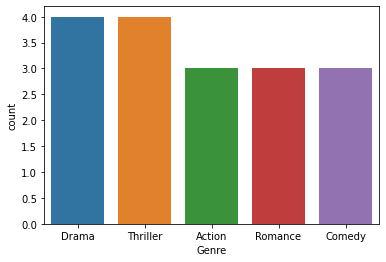

In [9]:
import seaborn as sns
sns.countplot(data=GenreBest, x = 'Genre')

Clearly Drame and Thriller occupy top spots during Festive Season

In [10]:
GenreBest.Genre.value_counts()

Drama       4
Thriller    4
Action      3
Comedy      3
Romance     3
Name: Genre, dtype: int64

4 Thrillers and 4 dramas were releases during Festive Season

Q4 How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [11]:
pd.crosstab(index =df.ReleaseTime,columns = df.Genre)

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


Q5 - In which year were maximum number movie released? (Note: Extract a new column called year from Release Date column.)

In [13]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year

In [14]:
df.Year

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Year, Length: 149, dtype: int64

In [16]:
df.Year.value_counts()

2014    70
2013    67
2015    12
Name: Year, dtype: int64

Clearly 2014 year has maximum movies released

Q6 - Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 30crore or more?

In [17]:
df['Month'] = df['Release Date'].dt.month_name(locale='English')
df.Month

0         April
1       January
2          July
3       January
4          July
         ...   
144    February
145       March
146       March
147       March
148         May
Name: Month, Length: 149, dtype: object

In [99]:
df.Budget.unique()

array([ 36,  10,   7,  18,  30,  33,  31,   2,  28,   5,  35,   4,  60,
        15,  27,  50,  24,  48,  42, 125,  12,  11,  21,  20,  75, 120,
       100,   8,  16,  40,   3,   9,  22,  45,  25,   6,  90,  70,  19,
        26,  85, 140,  29, 115,  14,  23,  13,  32, 150], dtype=int64)

In [123]:
HighBudgetMonth=df.loc[df.Budget>=30].Month
BudgetMonth=pd.DataFrame(HighBudgetMonth.value_counts())
BudgetMonth['No of HighBudget Releases'] = BudgetMonth['Month']
BudgetMonth['Month'] = BudgetMonth.index
BudgetMonth =BudgetMonth.reset_index()


<AxesSubplot:xlabel='Month', ylabel='No of HighBudget Releases'>

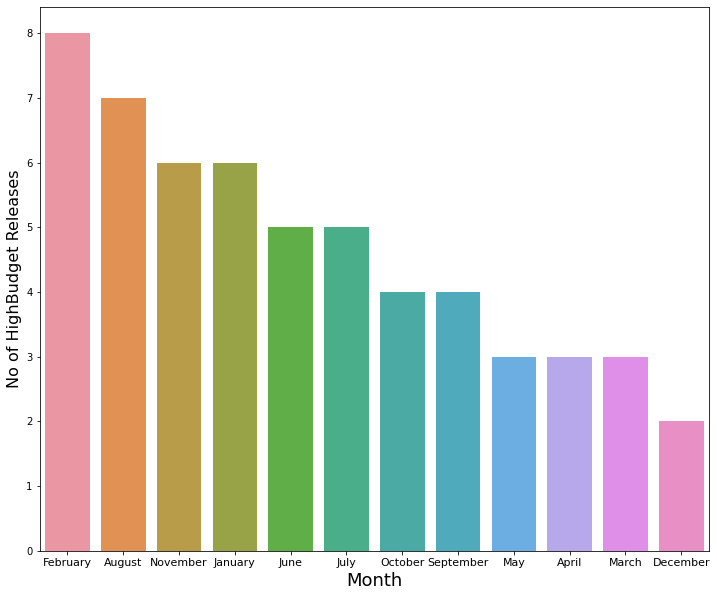

In [124]:
from matplotlib import pyplot as plt
# data = defaultdict(list)
# for i,j in HighBudgetMonth:
#     data['Month'].append(i)
#     data['No of HighBudget Releases'].append(len(j))

fig,ax = plt.subplots(figsize=([12,10]))
plt.xlabel('Month', fontsize=18)
plt.ylabel('No of HighBudget Releases', fontsize=16)
plt.xticks(fontsize=11)
sns.barplot(data=BudgetMonth,x = 'Month',y = 'No of HighBudget Releases')

Clearly the Month of Febuary sees the highest number of high budget movie releases(budget of 30 crs or more)

Q7 - Which are the top 10 flop movies with minimumreturn on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection–Budget) / Budget.

In [21]:
df['ROI'] = (df.BoxOfficeCollection-df.Budget)/df.Budget

In [22]:
Flops_10 = df.nsmallest(10,['ROI'])
Flops_10

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,Month,ROI
9,10,2013-01-11,Gangoobai,N,Drama,2,0.01,4354,1,1,2013,January,-0.995000
15,16,2013-01-18,Bandook,N,Action,4,0.09,28391,8,14,2013,January,-0.977500
53,54,2013-03-22,Sona Spa,N,Thriller,10,0.24,79430,61,112,2013,March,-0.976000
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013,January,-0.950000
49,50,2014-05-02,Kya Dilli Kya Lahore,HS,Drama,7,0.50,492344,2018,64,2014,May,-0.928571
121,122,2013-11-08,Satya 2,FS,Thriller,15,1.10,110315,89,26,2013,November,-0.926667
67,68,2014-05-02,Purani Jeans,HS,Romance,10,1.10,1537063,822,229,2014,May,-0.890000
103,104,2014-04-25,Samrat and Co.,N,Thriller,18,2.00,371133,532,180,2014,April,-0.888889
30,31,2014-02-07,Heartless,N,Thriller,12,1.50,4823892,5797,227,2014,February,-0.875000
102,103,2014-04-25,Kaanchi,N,Drama,31,4.00,2360968,2807,595,2014,April,-0.870968


In [23]:
# 10 flop movie names -
Flops_10.MovieName.unique()

array(['Gangoobai', 'Bandook', 'Sona Spa', 'Rajdhani Express',
       'Kya Dilli Kya Lahore', 'Satya 2', 'Purani Jeans',
       'Samrat and Co.', 'Heartless', 'Kaanchi'], dtype=object)

Q8- Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

<AxesSubplot:xlabel='ReleaseTime', ylabel='ROI'>

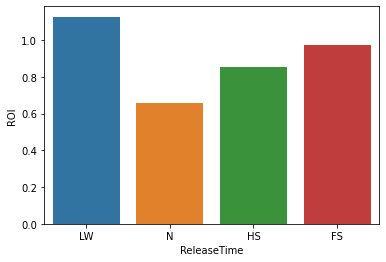

In [24]:
sns.barplot(data=df,x = 'ReleaseTime',y = 'ROI',ci=None)

Its clear to see movies has highest ROI when released on Long Weekends, even higher than that during Festive Season

In [25]:
ROI_Release = df.groupby('ReleaseTime')

In [26]:
ROI_Release.ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

Here are the average ROI collected per ReleaseTime

Q9 - Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [27]:
df.BoxOfficeCollection.corr(df.YoutubeLikes)

0.6825165877731297

There's a sufficiently high positive correlation between Youtube Likes and Box Office Collection

Q10 - Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

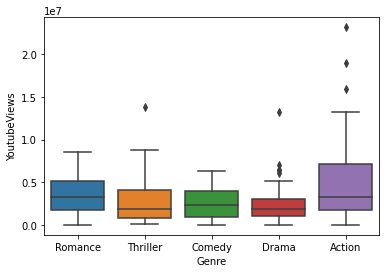

In [28]:
sns.boxplot(data=df,x = 'Genre',y = 'YoutubeViews')

Clearly Action Genre gets most Youtube Views

In [29]:
df.Genre.value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

Q11 - Which of the variables among Budget,BoxOfficeCollection,YoutubeView,YoutubeLikes,YoutubeDislikesare highly correlated? Note: Draw pair plot orheatmap.

<AxesSubplot:>

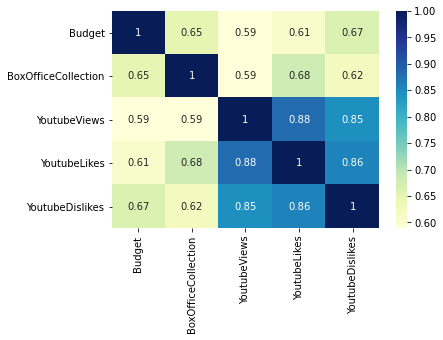

In [30]:
sns.heatmap(df[['Budget','BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes','YoutubeDislikes']].corr(),annot=True,cmap = 'YlGnBu')

Here, we can clearly observe the values of correlation between chosen variables

Q12 - During 2013−2015 period,highlight the genre of movies and theirbox office collection? Visualize with best fit graph.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

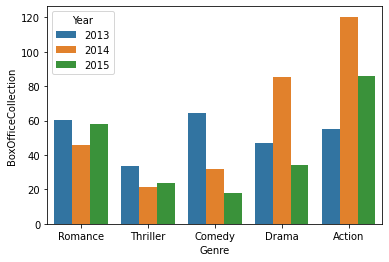

In [31]:
sns.barplot(data=df,x = 'Genre',y = 'BoxOfficeCollection',hue='Year',ci=None)

BoxOfficeCollection of each Genre across the period of 2013-2015 has been clearly highlighted by the visualization

Q13 - During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

<AxesSubplot:xlabel='Year', ylabel='count'>

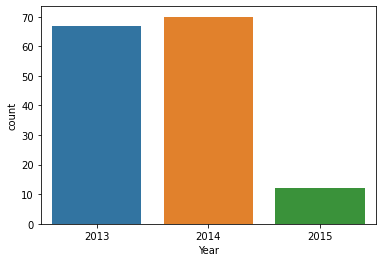

In [32]:
sns.countplot(data=df,x = 'Year')

Q14-Find the distribution of movie budget for every Genre.

<AxesSubplot:xlabel='Genre', ylabel='Budget'>

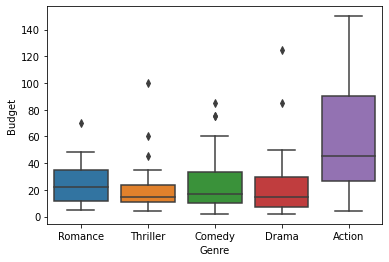

In [33]:
sns.boxplot(data=df,x = 'Genre',y = 'Budget')

Distribution of each genre's Budget visualized

15. During 2013−2015, Visualize the number of YouTube likes and YouTube dislikes every year. Also, visualize with best fit graph.

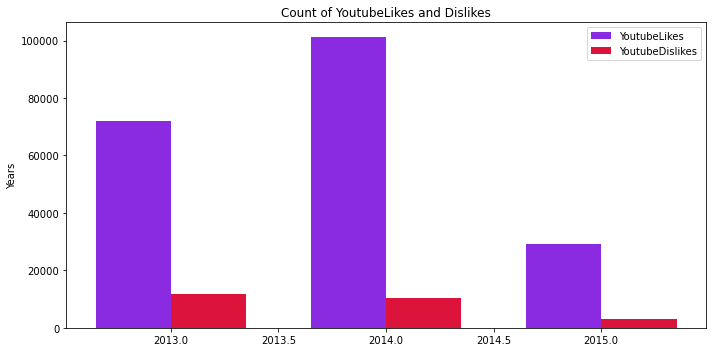

In [79]:
fig,ax = plt.subplots(figsize = (10,5))
width = 0.35
rects1 = ax.bar(df.Year - width/2, df.YoutubeLikes, width, label='YoutubeLikes',color = 'blueviolet')
rects2 = ax.bar(df.Year + width/2, df.YoutubeDislikes, width, label='YoutubeDislikes',color = 'crimson')
ax.set_ylabel('Years')
ax.set_title('Count of YoutubeLikes and Dislikes')
ax.legend()
fig.tight_layout()
# ax[1].bar(x = df.Year,height = df.YoutubeDislikes,color = 'limegreen')
# ax[1].set_title('YoutubeDislikes')

COMPLETE